In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

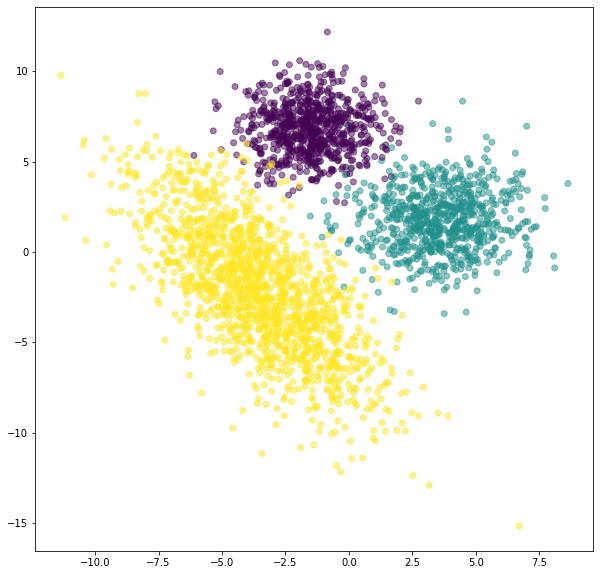

In [3]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [4]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

In [5]:
list(zip(unique, counts))

[(0, 750), (1, 750), (2, 1500)]

In [6]:
from sklearn.cluster import AgglomerativeClustering

In [7]:
ac = AgglomerativeClustering(n_clusters=3)

In [8]:
ac.fit(X)

AgglomerativeClustering(n_clusters=3)

In [9]:
ac.n_leaves_

3000

In [10]:
_, counts = np.unique(ac.labels_, return_counts=True)
for count in counts:
    print(count, end=' ')

1112 1142 746 

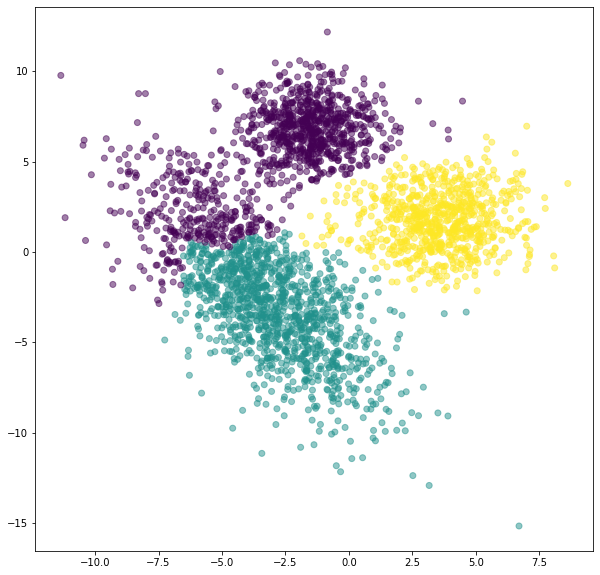

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=ac.labels_, alpha=0.5)
plt.show()

In [12]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [13]:
ac1 = AgglomerativeClustering(n_clusters=3, connectivity=connectivity)

In [14]:
ac1.fit(X)

AgglomerativeClustering(connectivity=<3000x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 21754 stored elements in Compressed Sparse Row format>,
                        n_clusters=3)

In [15]:
_, counts = np.unique(ac1.labels_, return_counts=True)
for count in counts:
    print(count, end=' ')

1486 746 768 

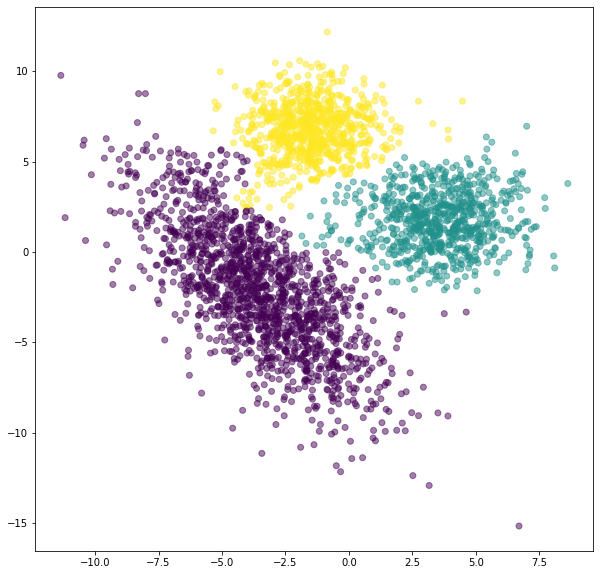

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=ac1.labels_, alpha=0.5)
plt.show()

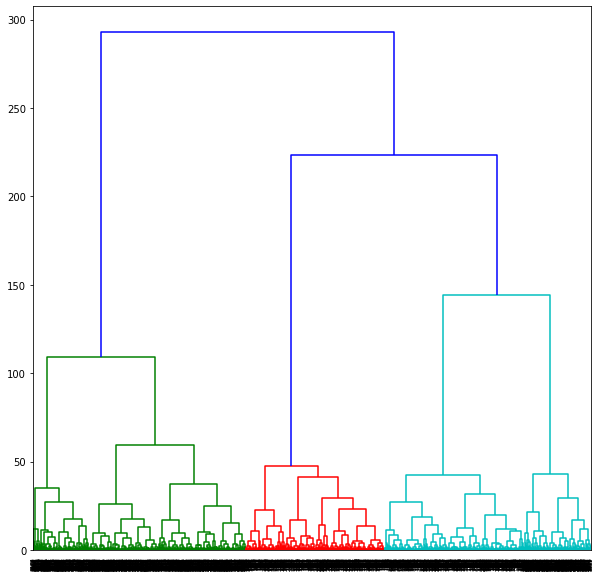

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
# подготовим данные для построения дендрограммы
# ещё один способ выполнить агломеративную кластеризацию
fig, ax = plt.subplots()
Z = linkage(X, "ward")
# строим дендрограмму
dendrogram(Z, leaf_rotation=90., ax=ax)
plt.show()

In [18]:
ac2 = AgglomerativeClustering(n_clusters=None, compute_full_tree=True, distance_threshold=150)

In [19]:
ac2.fit(X)

AgglomerativeClustering(compute_full_tree=True, distance_threshold=150,
                        n_clusters=None)

In [20]:
_, counts = np.unique(ac2.labels_, return_counts=True)
for count in counts:
    print(count, end=' ')

1112 1142 746 

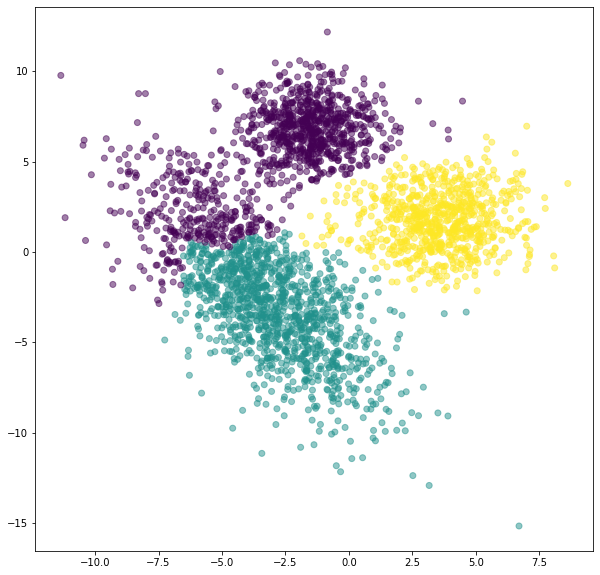

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=ac2.labels_, alpha=0.5)
plt.show()

In [22]:
ac3 = AgglomerativeClustering(n_clusters=None, compute_full_tree=True, distance_threshold=100)

In [23]:
ac3.fit(X)

AgglomerativeClustering(compute_full_tree=True, distance_threshold=100,
                        n_clusters=None)

In [24]:
_, counts = np.unique(ac3.labels_, return_counts=True)
for count in counts:
    print(count, end=' ')

840 355 746 757 302 

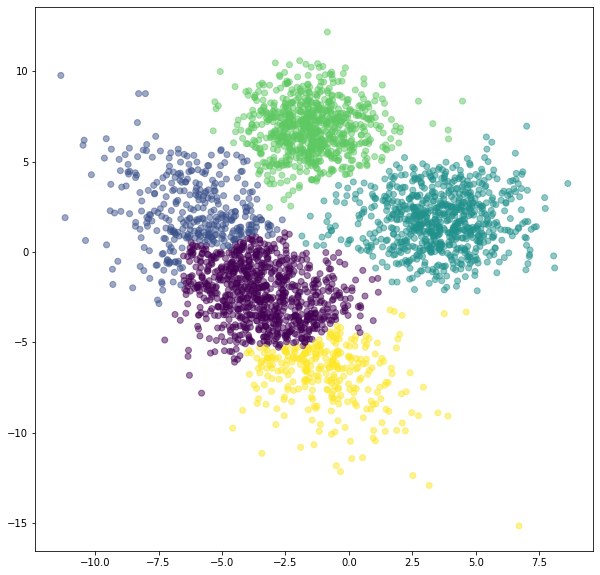

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=ac3.labels_, alpha=0.5)
plt.show()

Part2

In [26]:
import pandas as pd

In [27]:
df = pd.read_csv('foods.csv', sep=' ')

In [28]:
df.head()

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7


In [29]:
X = df.drop('Name', axis=1).to_numpy()
X

array([[340. ,  20. ,  28. ,   9. ,   2.6],
       [245. ,  21. ,  17. ,   9. ,   2.7],
       [420. ,  15. ,  39. ,   7. ,   2. ],
       [375. ,  19. ,  32. ,   9. ,   2.6],
       [180. ,  22. ,  10. ,  17. ,   3.7],
       [115. ,  20. ,   3. ,   8. ,   1.4],
       [170. ,  25. ,   7. ,  12. ,   1.5],
       [160. ,  26. ,   5. ,  14. ,   5.9],
       [265. ,  20. ,  20. ,   9. ,   2.6],
       [300. ,  18. ,  25. ,   9. ,   2.3],
       [340. ,  20. ,  28. ,   9. ,   2.5],
       [340. ,  19. ,  29. ,   9. ,   2.5],
       [355. ,  19. ,  30. ,   9. ,   2.4],
       [205. ,  18. ,  14. ,   7. ,   2.5],
       [185. ,  23. ,   9. ,   9. ,   2.7],
       [135. ,  22. ,   4. ,  25. ,   0.6],
       [ 70. ,  11. ,   1. ,  82. ,   6. ],
       [ 45. ,   7. ,   1. ,  74. ,   5.4],
       [ 90. ,  14. ,   2. ,  38. ,   0.8],
       [135. ,  16. ,   5. ,  15. ,   0.5],
       [200. ,  19. ,  13. ,   5. ,   1. ],
       [155. ,  16. ,   9. , 157. ,   1.8],
       [195. ,  16. ,  11. ,  14

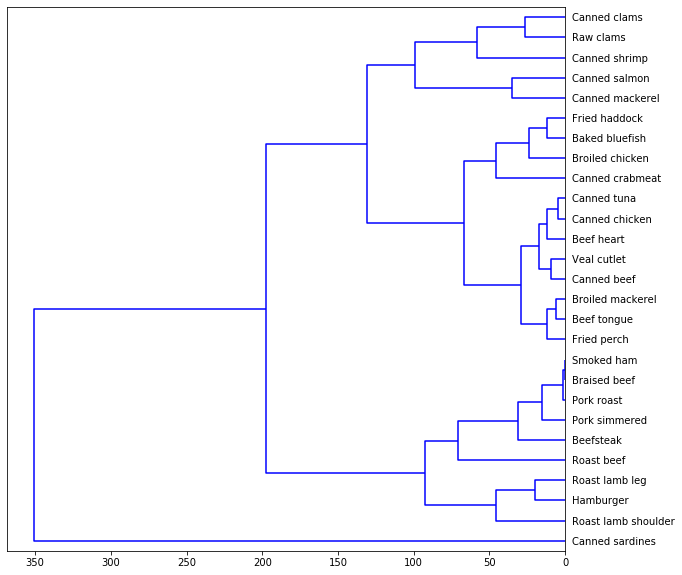

In [30]:
fig, ax = plt.subplots()
Z = linkage(X, method='average', metric='euclidean')
names = df.Name.values
#dendrogram(Z, color_threshold=0, labels=names, leaf_rotation=90.)#, orientation='left'
dend = dendrogram(Z, color_threshold=0, labels=names, leaf_rotation=90.)
plt.show()